# Metaheuristics Exam
# João Luis Brasil Gondim

## Part 1: Discrete optimization - Traveling Salesperson Problem

## 1. Choice of algorithm
<font size="3">The search for algorithms to solve the TSP problem in Google Scholar reveals some options: ant colony (33K results), genetic algorithm (37K results), particle swarm optimization (21K results)...<p>
Any of them represents a good choice. I chose the Genetic Algorithm: it is the mostly cited, I am relatively well acquainted to it and appreciate its characteristic to combine diversification and intensification in the search for the optimum.<p>
I created a mixed model in which the <b>first generation of individuals is partly (80%) generated by a greedy search algorithm and partly randomly generated (20%)</b>, as it is usual in Genetic Algorithm usage.<p>
This procedure can be seen as a <u><b>transfer learning from the greedy search algorithm to the genetic algorithm</b>, that is not randomly initialized</u>.</font>

## 2. Parameters of Genetic Algorithm
<font size="3">Each individual of the Genetic Algorithm is a route, that passes through each city and returns to the initial one.<p>
The population is a collection of routes and the objective of the Genetic Algorithm is to select the best fit individual, the route with the shortest path.<p>
    <b>- Single objective:</b> minimize route length, given by the sum of the Euclidean distance between each pair of consecutive cities: $$\sqrt{(x_a - x_b)^2+(y_a - y_b)^2}$$
    <b>- Genetic Operators:</b><p>
<u>Crossover operator:</u> ordered crossover (OX - cxOrdered). I also tried: one point crossover (cxOnePoint), uniform crossover (cxUniform), partially matched crossover (PMX - cxPartialyMatched).<p>
<u>Mutation operator:</u> Shuffle the attributes of the input individual and return the mutant (mutShuffleIndexes) with probability = 0.05.<p>
<u>Selection operator:</u> Select the best individual among 3 randomly chosen individuals (selTournament). I also tried 4 and 5 tournament sizes.<p></font>

<font size="3"><b>- Common parameters for both problems:</b><p>
    <u>Crossover probability:</u> 0.8, also tried 0.7 and 0.9.<p>
    <u>Mutation probability:</u> 0.1, also tried 0.05 and 0.2.<p>
    <u>Number of generations:</u> 200, enough to reach convergence.</font>

<font size="3"><b>- Parameters specific for each problem:</b><p>

| Parameter | Djibouti (38 cities) | Qatar (194 cities) |
| ------ | ------ | ------ |
| number of individuals | 2,000 | 5,000 |
| individual initialization | random permutation | greedy algorithm (80%)<p> and random permutation (20%) |
    
</font>

<font size="3">The solution for the Qatar problem, with the bigger number of cities, used the following enhancements:<p>
- Higher number of individuals: 5,000
- Different <b>initialization mechanism</b>: instead of initializing all individuals randomly, we opted to <b><u>initialize 80% of them using a greedy search algorithm</s></b> described below and <b><u>20% randomly</u></b>. I also tried different fractions of greedy individuals initialization: 0.2, 0.5 and 1.<p>
The greedy search initialization algorithm started with a randomly chosen city. The next city in the route is the closest one to the last city (among those which are not still in the route). This choice is repeated until all cities belong to the route.<p>.
Greedy search algorithms are known for <b>NOT obtaining the optimal solution for the TSP problem</b>. But we imagined that adding some individuals generated by greedy search algorithms (to the initial generation of the GA algorithm) could improve the results over solutions obtained with only randomly generated individuals.<p>
The results confirmed our guess, yielding fitness approximately half of those from fully randomly generated individuals.<p></font>

## 3. Problem #1: 38 cities (Djibouti)

### a) Stopping criterion
<font size="3">The algorithm ran for 200 generations. This was enough to show convergence.</font>
### b) Computational time
<font size="3">Wall time: 1min 16s</font>

### c) Results

#### <font size="4"> - Solution</font>

In [ ]:
best_route_Djibouti = best_individual

In [50]:
np.array(best_route_Djibouti).T

array([17, 16, 15, 12, 14, 19, 22, 25, 24, 21, 23, 27, 26, 30, 35, 33, 32,
       37, 36, 34, 31, 29, 28, 20, 13,  9,  0,  1,  3,  2,  4,  5,  6,  7,
        8, 11, 10, 18])

#### <font size="4"> - Fitness</font>

In [53]:
print('Fitness of the best individual: ', evaluation(best_route_Djibouti))

Fitness of the best individual:  (6659.431532931465,)


#### <font size="4">- Solution plot</font>

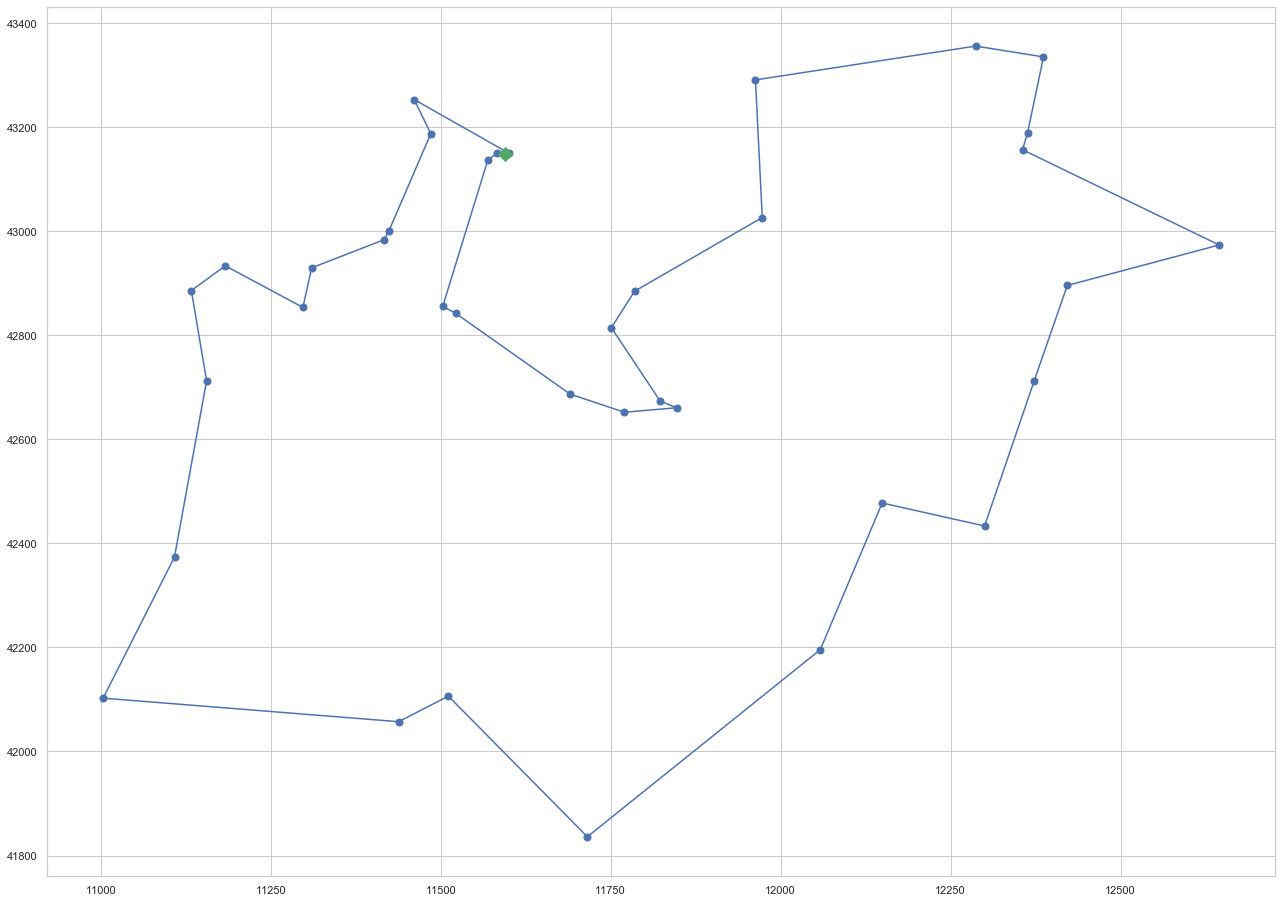

In [32]:
plot_route(create_route(best_route_Djibouti))

### d) Convergence curve

num_individuals 2000
mating_prob 0.8
mutating_prob 0.1
num_generations 200
Fitness of the best individual:  6659.431532931465
Wall time: 1min 16s


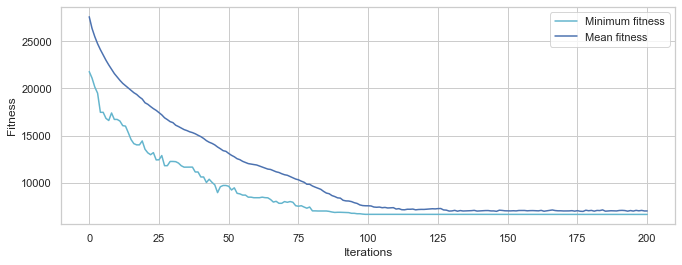

In [28]:
%%time 
NUM_INDIVIDUALS = 2000

MATING_PROB     = 0.8
MUTATING_PROB   = 0.1
NUM_GENERATIONS = 200

best_individual, result, log = run_GA_model(NUM_INDIVIDUALS, MATING_PROB, MUTATING_PROB, NUM_GENERATIONS)

## 4. Problem #2: 194 cities (Qatar)

### a) Stopping criterion
<font size="3">The algorithm ran for 200 generations. This was enough to show convergence.</font>
### b) Computational time
<font size="3">Wall time: 11min 39s</font>

### c) Results

#### <font size="4">- Solution</font>

In [289]:
best_route_Qatar = best_individual

In [290]:
np.array(best_route_Qatar).T

array([ 31,  34,  43,  41,  49,  48,  54,  53,  72,  83,  99, 104, 105,
       106, 107, 109, 111, 114, 115, 116, 120, 119, 127, 122, 123, 132,
       134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 153, 156,
       149, 143, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131,
       126, 124, 125, 113, 112, 108, 118, 121, 117, 159, 169, 166, 167,
       164, 158, 157, 161, 165, 170, 184, 179, 177, 180, 176, 183, 187,
       192, 190, 188, 191, 189, 186, 185, 182, 178, 171, 168, 175, 181,
       193, 173, 172, 174, 163, 162, 160, 155, 129, 110, 103, 100,  98,
        93,  89,  88,  97,  85,  84,  64,  19,  62,  35,  15,   7,   5,
         3,   0,   1,   2,   6,  12,  58,  61,  81,  79,  75,  74,  77,
        71,  73,  68,  59,  56,  44,  28,  21,  27,  32,  17,  20,  23,
        25,  16,  13,  10,  22,  24,  70,  86, 101, 102,  90,  92,  95,
        94,  96,  91,  87,  82,  80,  78,  76,  69,  63,  67,  65,  66,
        60,  57,  55,  52,  51,  47,  45,  40,  37,  39,  42,  4

#### <font size="4">- Fitness</font>

In [291]:
print('Fitness of the best individual: ', evaluation(best_route_Qatar))

Fitness of the best individual:  (10625.676101077972,)


#### <font size="4">- Solution plot</font>

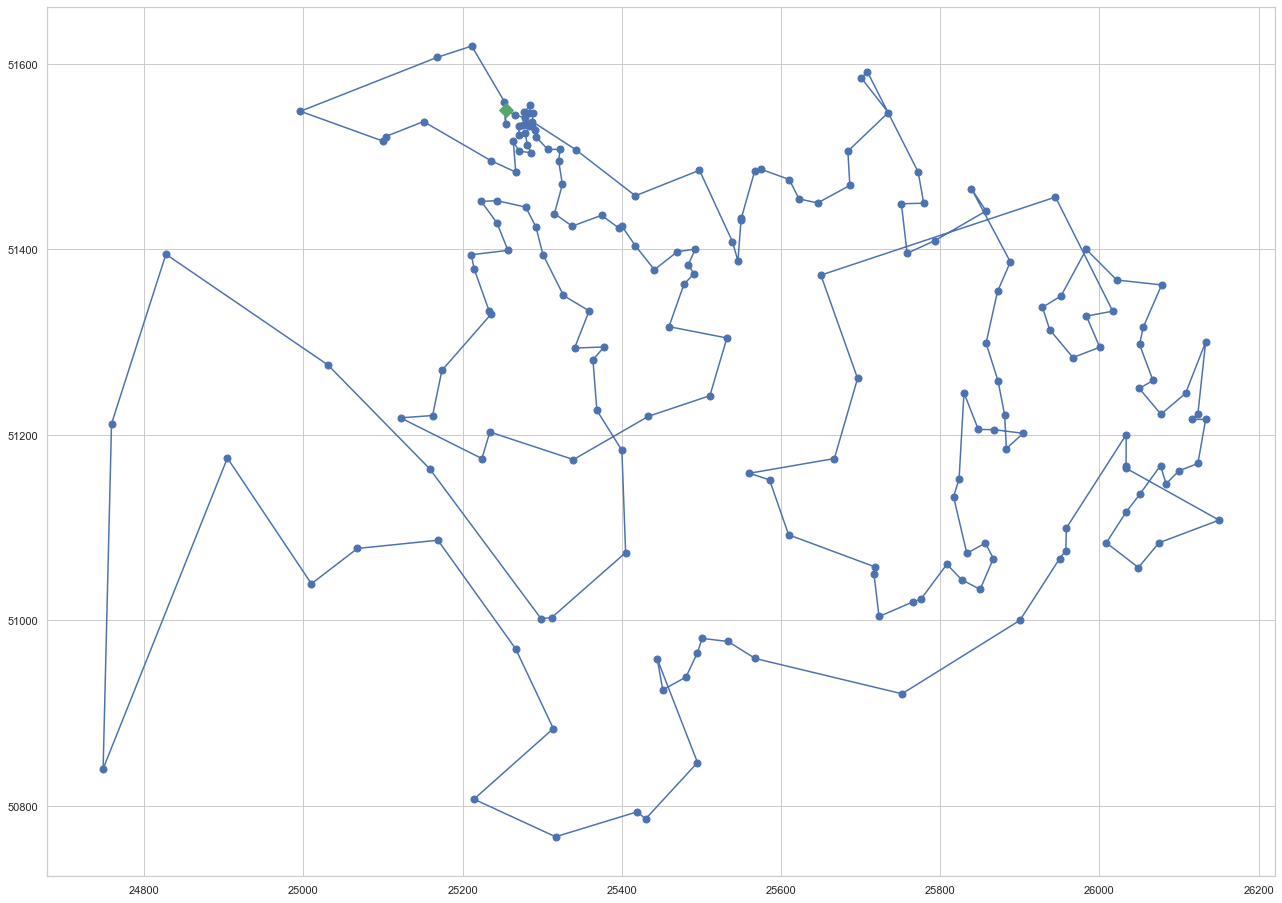

In [288]:
plot_route(create_route(best_route_Qatar))

### d) Convergence curve

num_individuals 5000
mating_prob 0.8
mutating_prob 0.1
num_generations 200
Fitness of the best individual:  10625.676101077972
Wall time: 11min 39s


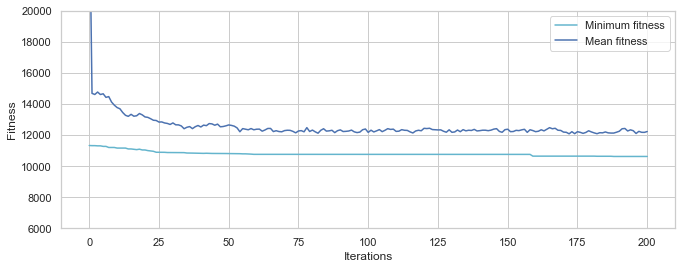

In [287]:
%%time 
NUM_INDIVIDUALS = 5000
MUTATING_PROB = 0.1
NUM_GENERATIONS = 200
toolbox.register("select", tools.selTournament, tournsize = 4)
best_individual, result, log = run_GA_model(NUM_INDIVIDUALS, MATING_PROB, MUTATING_PROB, NUM_GENERATIONS)